In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
## Importing dataset
data = pd.read_spss('../secom.SAV')

In [19]:
data.head()

,ID,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,feature010,feature011,feature012,feature013,feature014,feature015,feature016,feature017,feature018,feature019,feature020,feature021,feature022,feature023,feature024,feature025,feature026,feature027,feature028,feature029,feature030,feature031,feature032,feature033,feature034,feature035,feature036,feature037,feature038,feature039,feature040,feature041,feature042,feature043,feature044,feature045,feature046,feature047,feature048,feature049,feature050,feature051,feature052,feature053,feature054,feature055,feature056,feature057,feature058,feature059,feature060,feature061,feature062,feature063,feature064,feature065,feature066,feature067,feature068,feature069,feature070,feature071,feature072,feature073,feature074,feature075,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature084,feature085,feature086,feature087,feature088,feature089,feature090,feature091,feature092,feature093,feature094,feature095,feature096,feature097,feature098,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature150,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,feature187,feature188,feature189,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229,feature230,feature231,feature232,feature233,feature234,feature235,feature236,feature237,feature238,feature239,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature257,feature258,feature259,feature260,feature261,feature262,feature263,feature264,feature265,feature266,feature267,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature277,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature285,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature314,feature315,feature316,feature317,feature318,feature319,feature320,feature321,feature322,feature323,feature324,feature325,feature326,feature327,feature328,feature329,feature330,feature331,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature36

### Splitting the data 30% goes for testing

In [20]:

data.drop(['ID', 'timestamp'], axis='columns', inplace=True)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

y = data['class']

data.drop('class', axis='columns', inplace=True)
X = data

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)
X_train = X_train.copy()

pd.set_option('display.max_columns', None)

In [21]:
y_test.value_counts()

0.0    295
1.0     19
Name: class, dtype: int64

## :: OUTLIER DETECTION ::

In [22]:
def outlier_detection_and_replacement(DataSet):
    DataSet.fillna(0)
    Q1 = DataSet.quantile(0.25)
    Q3 = DataSet.quantile(0.75)
    IQR = Q3 - Q1

    DataSet[(DataSet < (Q1 - 1.5 * IQR)) | (DataSet > (Q3 + 1.5 * IQR))] = np.nan
    return DataSet.copy()

## :::: FEATURE REDUCTION :::: 

### Nulls Treatment / Features lower than certain percentage will be deleted

In [23]:
import missingno as msno

def delete_features_too_many_nulls(dataSet, percentage):
    msno.matrix(dataSet)
    plt.show()
    
    features_to_delete = []

    for col in dataSet.columns:
        missing_percentage = 100 * (dataSet[col].isna().sum() / len(dataSet[col]))
        if (missing_percentage > percentage):
            features_to_delete.append(col)
            dataSet.drop(col, axis=1, inplace=True)
            
    print(f"# Features deleted with more than {percentage} % missing values", len(features_to_delete))

    return features_to_delete


### Variance / Features lower than the threashold will be deleted 

In [24]:
# Here what we want to do is to delete the features with a certain threashold that has no variance
# example we have a feature and a threashold of 80% then the interpretation would be
# we want to delete the features whose values are equal in more than 80% of the dataset 
# As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples.
# Here's the formula = Var[X] = p(1-p) .8 * (1 - .8):

def remove_features_low_variance(dataSet, threashold):
    
    initialLen = dataSet.shape[1]
    normalized_df = dataSet / dataSet.mean()
    
    var_threashold = threashold * (1 - threashold)
    
    # Create a VarianceThreshold feature selector
    sel = VarianceThreshold(threshold=var_threashold)

    # Fit the selector to normalized head_df
    sel.fit(normalized_df)

    # Create a boolean mask
    mask = sel.get_support()

    # Apply the mask to create a reduced dataframe
    features_low_variance = dataSet.loc[:, ~mask].columns
    
    dataSet.drop(features_low_variance, axis=1, inplace=True)

    print("Dimensionality reduced from {} to {}.".format(initialLen, dataSet.shape[1]))
    
    
    return features_low_variance

## :::: IMPUTATION ::::

### Imputation of Data / Using MICE

In [25]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_values_mice(dataSet):
    dataSet_imputed = dataSet.copy(deep=True)
    mice_imputer = IterativeImputer()
    dataSet_imputed.iloc[:, :] = mice_imputer.fit_transform(dataSet)
    
    return dataSet_imputed


## :::: BALANCE DATASET ::::

### Treat imbalanced Data / OverSampling

In [26]:
from imblearn.over_sampling import SMOTE 

def balance_dataset(dataSet, target):
    sm = SMOTE(random_state=42)
    dataSet_sm, target_sm = sm.fit_resample(dataSet, target)

    print(':::: After Balancing Dataset Using SMOTE :::::')
    target_sm.value_counts().plot.bar(color=['purple', 'yellow'])
    
    
    return dataSet_sm, target_sm

## ::: CONFUSION MATRIX UTILITY :::

In [27]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

def confusion_matrix_and_metrics(model, y_test, preds, X_test):
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 6))
    plt.title('Confusion Matrix', size=16)
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d",xticklabels=['Act. pass', 'Act. fail'], yticklabels=['Pred. pass', 'Pred. fail']);
    print(classification_report(y_test, preds))


    print('Average Accuracy:', accuracy_score(y_test, preds))


## :::: CRISP STEPS EXECUTION ::::

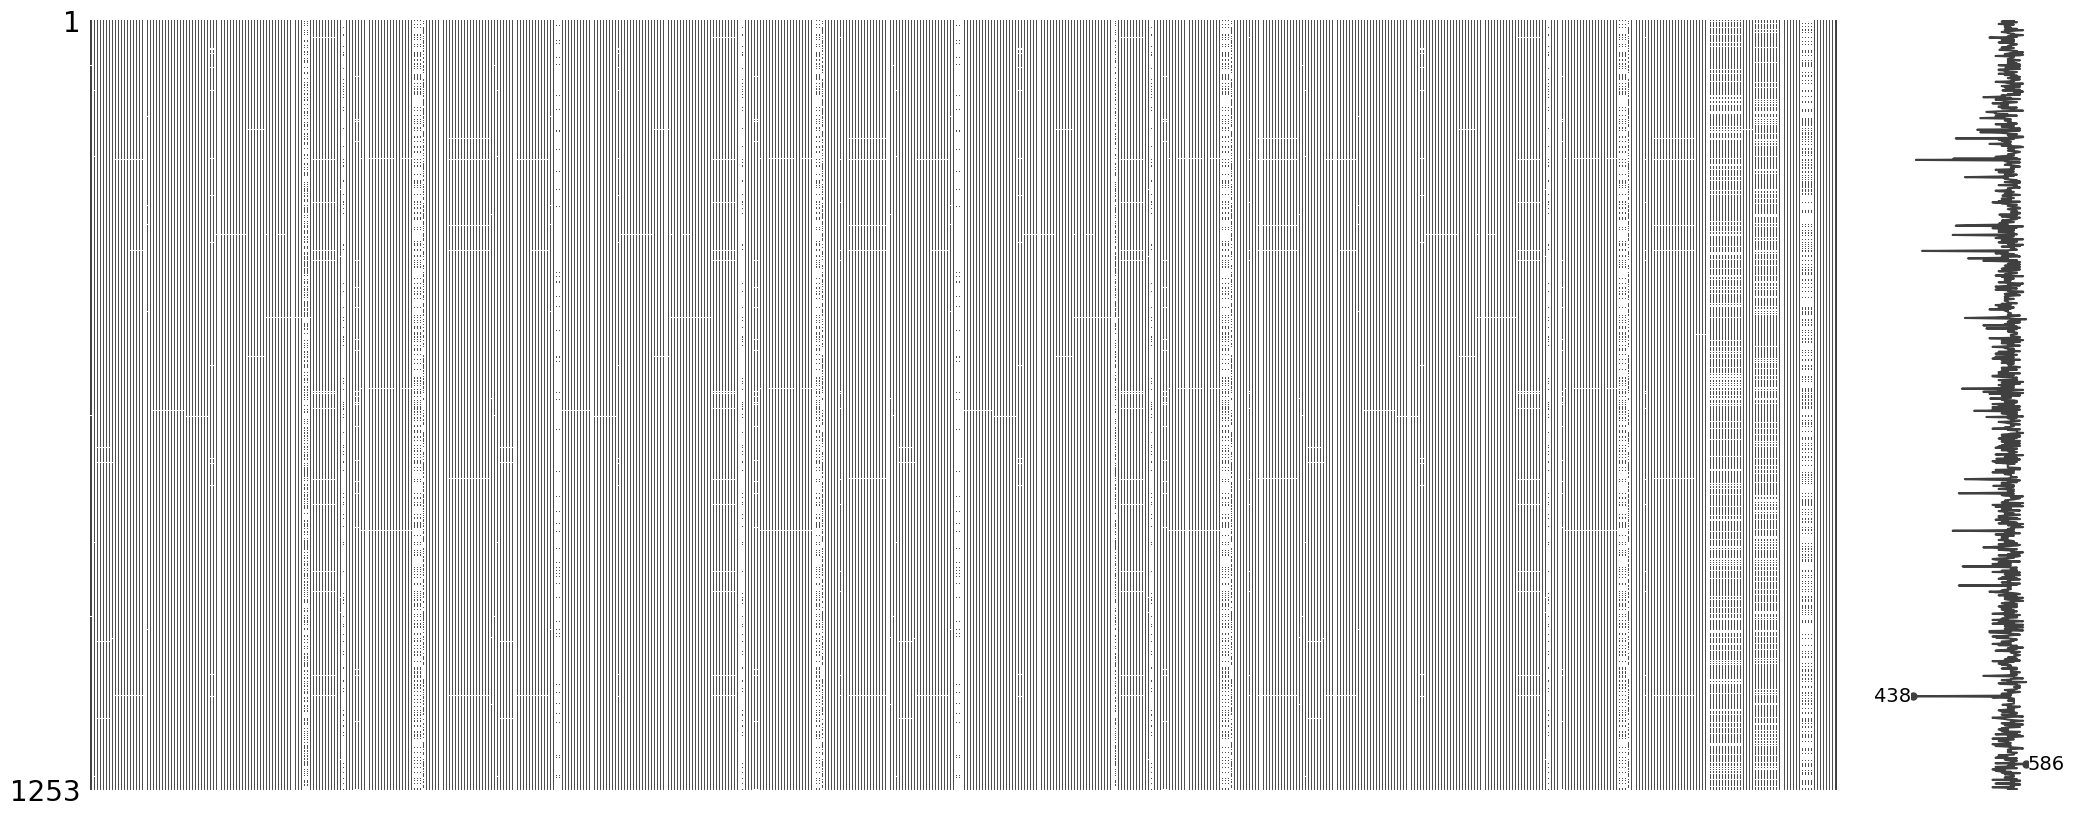

# Features deleted with more than 55 % missing values 24
Dimensionality reduced from 566 to 346.


/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


:::: After Balancing Dataset Using SMOTE :::::


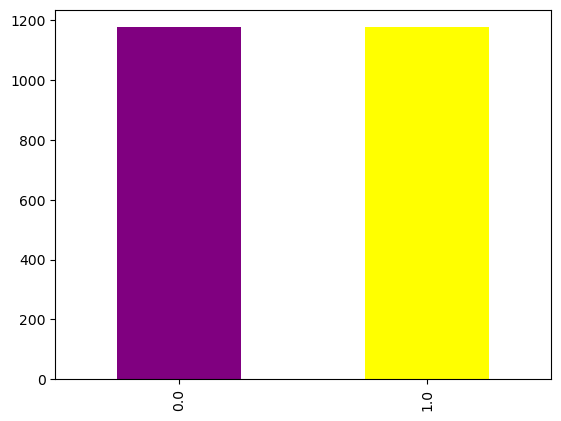

In [28]:

## Step 2  :: HANDLING NULLS ::
nulls_features_to_drop = delete_features_too_many_nulls(X_train, percentage=55)

## Step 3  :: LOW VARIANCE FEATURES ::
low_variance_features_to_drop = remove_features_low_variance(X_train, threashold=0.95)

## Step 4 :: OUTLIERS HANDLING ::
X_train = outlier_detection_and_replacement(X_train)

## Step 5  :: MICE IMPUTATION ::
dataImputed = impute_values_mice(pd.concat([X_train, y_train], axis=1))
y_train = dataImputed['class']
X_train = dataImputed.drop('class', axis='columns')

## Step 7 :: BALANCING :::
X_train, y_train =  balance_dataset(X_train, y_train) 

### Applying same steps to Test Data

In [29]:
## Step 2 :: USING SELECTED FEATURES FOR TRAIN DATA ::
##X_test = X_test[features_to_keep]
X_test = X_test[np.array(X_train.columns)]

## Step 4 :: OUTLIERS HANDLING ::
X_test = outlier_detection_and_replacement(X_test)

## Step 3  :: MICE IMPUTATION ::
dataImputed = impute_values_mice(pd.concat([X_test, y_test], axis=1))
y_test = dataImputed['class']
X_test = dataImputed.drop('class', axis='columns')




/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [31]:
X_train['class'] = y_train

In [35]:
X_test['class'] = y_test

In [36]:
X_test

,feature004,feature005,feature010,feature011,feature015,feature017,feature024,feature025,feature041,feature042,feature052,feature060,feature064,feature065,feature066,feature068,feature072,feature075,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature090,feature092,feature093,feature094,feature095,feature096,feature097,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature115,feature123,feature126,feature130,feature136,feature137,feature138,feature140,feature141,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature175,feature177,feature178,feature182,feature183,feature184,feature185,feature186,feature188,feature189,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature222,feature223,feature224,feature225,feature226,feature228,feature229,feature239,feature240,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature268,feature269,feature270,feature271,feature272,feature273,feature275,feature276,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature307,feature312,feature313,feature318,feature319,feature320,feature321,feature322,feature324,feature325,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature360,feature361,feature362,feature363,feature364,feature366,feature367,feature368,feature369,feature377,feature378,feature386,feature387,feature388,feature389,feature390,feature391,feature392,feature393,feature394,feature406,feature407,feature408,feature409,feature410,feature411,feature413,feature414,feature416,feature417,feature418,feature419,feature420,feature421,feature422,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature435,feature436,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature444,feature448,feature449,feature454,feature455,feature456,feature457,feature458,feature460,feature461,feature468,feature469,feature470,feature471,feature472,feature473,feature474,feature475,feature476,feature477,feature478,feature479,feature480,feature481,feature483,feature484,feature485,feature486,feature487,feature488,feature489,feature490,feature491,feature492,feature494,feature495,feature496,feature497,feature498,feature500,feature501,feature511,feature512,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature540,feature541,feature542,feature547,feature550,feature551,feature552,feature553,feature554,feature555,feature556,feature557,feature558,feature560,feature561,feature562,feature565,feature566,feature567,feature568,feature569,feature570,feature573,feature574,feature575,feature576,feature577,feature578,feature584,feature585,feature586,feature587,feature588,feature589,feature590,class
1094,1095.3519,1.3425,-0.0028,0.0044,9.7447,9.6654,-3821.250000,106.7500,79.860000,3.200000,167.7405,4.395500,14.858200,17.271000,19.618500,1.017400,105.247200,0.0,-0.0072,-0.0086,-0.0285

In [39]:


compression_opts = dict(method='zip',
                        archive_name='train.csv') 
X_train.to_csv('train.zip', index=False,
          compression=compression_opts)


compression_opts = dict(method='zip',
                        archive_name='test.csv') 
X_test.to_csv('test.zip', index=False,
          compression=compression_opts)